InvalidIndexError: (slice(None, None, None), 0)

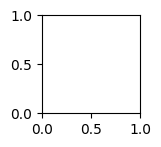

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./Datasets/adult.csv', comment = '#')

# First, create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex', 'income']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now properly separate features and target
X = df_encoded.drop(columns=['income', 'native.country', 'education'])
y = df_encoded['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



n_features = 10
fig=plt.figure( figsize=(15, 15) )
plt_num = 1
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, plt_num)
        if(i == j):
            ax.hist(X_train[:, i], bins=25, color='gray')
        else:
            ax.scatter(X_train[:, j], X_train[:, i], c=np.array(colors)[y_train], s=30, alpha=0.3)
                
        if(i == n_features-1):
            ax.set_xlabel(f'$x_{{{j}}}$', fontsize=22)
        
        if(j==0):
            ax.set_ylabel(f'$x_{{{i}}}$', fontsize=22)

        ax.grid(True)
        plt_num +=1
